# Alcuni algoritmi numerici

In questo notebook sono introdotti un paio di algoritmi numerici che saranno utili in alcuni calcoli di probabilità e metodi statistici.

## Metodo di bisezione per trovare lo zero di una funzione

Assumiamo che una funzione sia monotona in un intervallo.

In [5]:
import matplotlib.pyplot as plt
import numpy as np

Si parte dai due estremi $x_1$ e $x_2$; si verifica che il segno della funzione sia opposto ai due valori estremi, $f(x_1)$ e $f(x_2)$, e si divide in due l'intervallo: $x_m = (x_1+x_2)/2$. Poi si scarta l'intervallo $[x_1, x_m]$ oppure $[x_m, x_2]$ dove la funzione non interseca $y=0$.

In [6]:
def root(f, x1, x2, xtol=1e-5, maxiter=100):
    f1, f2 = f(x1), f(x2)
    if f1*f2>0:
        print('error: y=f(x) does not intersect y=0')
        return None
    iters = 0
    pts = []
    while (x2 - x1) > xtol and iters < maxiter:
        xm = (x1 + x2)/2
        fm = f(xm)
        if f1*fm>0: x1, f1 = xm, fm
        else: x2, f2 = xm, fm
        iters += 1
        print(iters, x1, x2)
        pts.append(xm)
    return (x1+x2)/2, np.array(pts)

1 0 0.5
2 0.25 0.5
3 0.375 0.5
4 0.375 0.4375
5 0.40625 0.4375
6 0.40625 0.421875
7 0.40625 0.4140625
8 0.40625 0.41015625
9 0.408203125 0.41015625
10 0.408203125 0.4091796875
11 0.408203125 0.40869140625
12 0.408203125 0.408447265625
13 0.4083251953125 0.408447265625
14 0.4083251953125 0.40838623046875
15 0.4083251953125 0.408355712890625
16 0.4083251953125 0.4083404541015625
17 0.4083251953125 0.40833282470703125
x0 = 0.4083290100097656


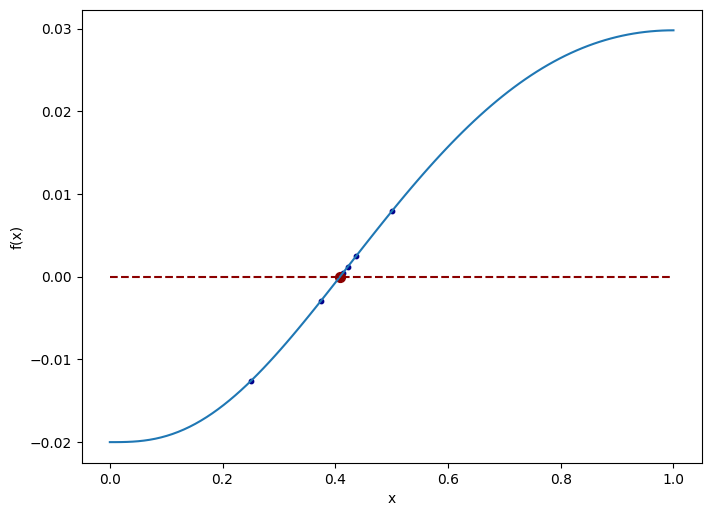

In [7]:
def f(x):
    return x**3*np.exp(-3*x)-0.02
r, pts = root(f, 0, 1)
print("x0 =", r)
plt.figure(figsize=(8,6), dpi=100)
xs = np.linspace(0, 1, 100)
ys = f(xs)
plt.plot(xs, ys)
plt.plot(xs, np.zeros(len(xs)), color='darkred', linestyle='--')
plt.scatter(pts, f(pts), color='darkblue', s=10)
plt.scatter([r], [0], color='darkred', s=50)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

## Ricerca del minimo di una funzione: *gradient descent*

Ad ogni iterazione ci si sposta in maniera opposta al gradiente (in una dimensione alla derivata) della funzione con passo che dipende dalla velocità che vogliamo ottenere.

Attenzione: un passo troppo grande può causare il superamento del minimo e la divergenza dell'algoritmo!

In [8]:
def fmin(f, f1, x0, rate=0.1, xtol=0.000001, maxiter=1000):
    delta = 1
    iters = 0
    pts = [x0]
    while delta > xtol and iters < maxiter:
        x1 = x0
        x0 -= rate*f1(x1)
        delta = abs(x1 - x0)
        iters += 1
        print(iters, x1)
        pts.append(x1)
    return x1, np.array(pts)

1 1
2 4.009
3 2.168132917000001
4 2.5266667226430766
5 2.267103833306966
6 2.445845045448546
7 2.3176022920487256
8 2.4073015962101523
9 2.343327217212027
10 2.3883668122439534
11 2.3563533332632303
12 2.3789591682997697
13 2.3629204767047516
14 2.374262220893924
15 2.3662229002569832
16 2.3719118998743434
17 2.3678813239948653
18 2.3707345437472758
19 2.368713567865765
20 2.3701444531952798
21 2.369131060588738
22 2.3698486222489645
23 2.3693404563804723
24 2.3697002934589837
25 2.3694454703510335
26 2.369625916954749
27 2.3694981334189995
28 2.3695886211209767
29 2.3695245426141818
30 2.3695699189501513
31 2.3695377860028897
32 2.3695605405815496
33 2.3695444271110424
34 2.369555837696418
35 2.3695477573907353
36 2.369553479378535
37 2.369549427405183
38 2.369552296770655
39 2.369550264856226
40 2.369551703736893
41 2.369550684807078


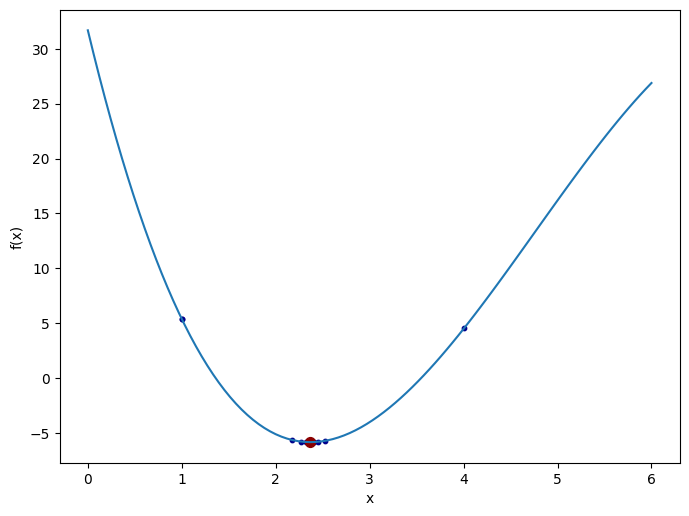

In [17]:
def f(x):
    return 10*(x-1.78)**2 - 0.7*x**3
def f1(x):
    return 10*2*(x-1.78) - 0.7*3*x**2
plt.figure(figsize=(8,6), dpi=100)
xs = np.linspace(0, 6, 100)
ys = f(xs)
xmin, pts = fmin(f, f1, 1, 0.17)
plt.plot(xs, ys)
plt.scatter(pts, f(pts), color='darkblue', s=10)
plt.scatter([xmin], [f(xmin)], color='darkred', s=50)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

Se la derivata della funzione non è nota, dobbiamo cavarcela da soli. Dobbiamo però fare attenzione alla stabilità numerica dell'algoritmo che usiamo per calcolare la derivata!

In [20]:
def fmin1(f, x0, rate=0.1, xtol=0.000001, maxiter=1000):
    delta = 1
    iters = 0
    x1 = x0
    pts = [x0]
    while delta > xtol and iters < maxiter:
        x0 = x1
        f1 = (f(x0+xtol)-f(x0))/xtol
        x1 -= rate*f1
        delta = abs(x1 - x0)
        iters += 1
        pts.append(x1)
        print(iters, x1)
    return x1, np.array(pts)

1 4.167000034532293
2 3.3776916238298327
3 2.818016850779088
4 2.532152162715846
5 2.4216726096543084
6 2.3854118516314315
7 2.3742927961772864
8 2.370960673981344
9 2.369969192941852
10 2.3696748057072625
11 2.36958745273796
12 2.3695615375035572
13 2.3695538497509006
14 2.3695515692018176
15 2.3695508925786157


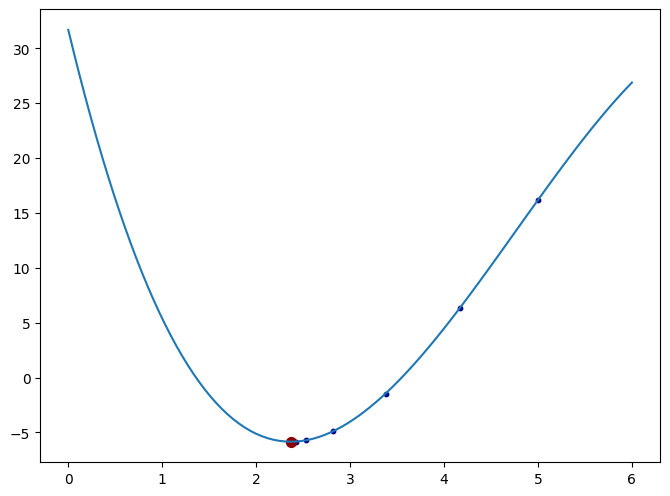

In [21]:
def f(x):
    return 10*(x-1.78)**2 - 0.7*x**3
plt.figure(figsize=(8,6), dpi=100)
xs = np.linspace(0, 6, 100)
ys = f(xs)
xmin, pts = fmin1(f, 5, 0.07)
plt.plot(xs, ys)
plt.scatter(pts, f(pts), color='darkblue', s=10)
plt.scatter([xmin], [f(xmin)], color='darkred', s=50)
plt.show()

# Minimizzazioni a più variabili

Lo stesso metodo può essere applicato in più dimensioni seguendo il **gradiente** della funzione, che generalizza la derivata nel caso monodimensionale.

In più dimensioni, per funzioni complesse, può essere problematica la ricerca del **minimo assoluto** quando sono presenti dei **minimi locali** nei quali l'algoritmo può rimanere bloccato.

Per questo, può essere utile provare a cambiare il valore inziale dal quale parte la ricerca del minimo e verificare qual è il minimo raggiunto.

Nei problemi di fit, spesso la natura della funzione che modellizza il problema ci potrà aiutare. Ad esempio, se cerchiamo un picco, un valore iniziale vicino al centro del picco ci aiuterà a far convergere il fit verso il valore ottimale.

# Approfondimenti

* [Understanding the Mathematics behind Gradient Descent](https://towardsdatascience.com/understanding-the-mathematics-behind-gradient-descent-dde5dc9be06e)
* [Gradient Descent via Python](https://medium.com/@pasdan/gradient-descent-via-python-f18566dd98c6)